# Random Forest Classifier

O objetivo é utilizar características biomecânicas de diferentes pacientes para classificar se eles são normais, se tem hérnia de disco ou se tem espondilolistese. O processo de classificação será feito utilizando Random Forest Classifier

Dataser obtido do Kaggle (https://www.kaggle.com/uciml/biomechanical-features-of-orthopedic-patients)

Este problema contêm dois datasets. O dataset biomechanical_3C.csv contêm dados das três classes e no dataset biomechanical_2C.csv, os pacientes com hérnia de disco ou espondilolisteste foram classificados como anormais.

Vamos utilizar o dataset com os dados das três classes

Importando bibliotecas usuais

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dados = pd.read_csv('biomechanical_3C.csv')

In [3]:
dados.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


Verificando a existência de NaNs

In [5]:
dados.isna().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

Verificando a quantidade de elementos de cada classe

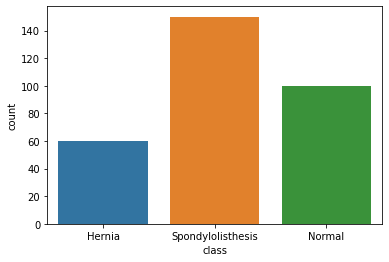

In [6]:
sns.countplot(x='class',data=dados)

In [7]:
dados['class'].value_counts()

Spondylolisthesis    150
Normal               100
Hernia                60
Name: class, dtype: int64

In [8]:
classes = dados['class'].unique()
n_classes = len(classes)

Observamos que apesar da amostra não estar balanceada, a diferença entre as classes não é muito grande

Verificando a distribuição de cada variável

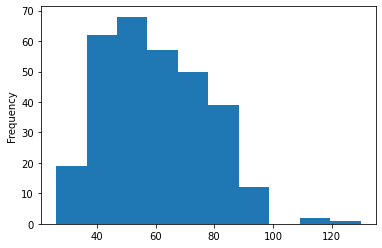

In [9]:
dados['pelvic_incidence'].plot(kind='hist')

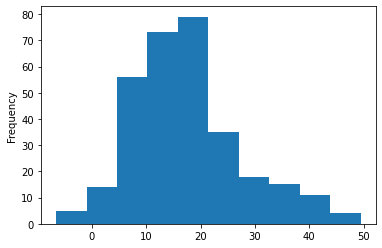

In [10]:
dados['pelvic_tilt'].plot(kind='hist')

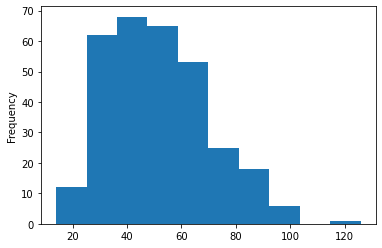

In [11]:
dados['lumbar_lordosis_angle'].plot(kind='hist')

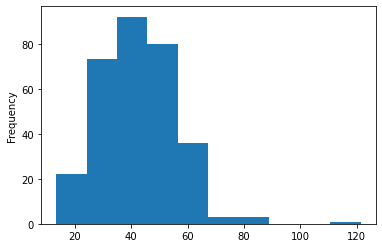

In [12]:
dados['sacral_slope'].plot(kind='hist')

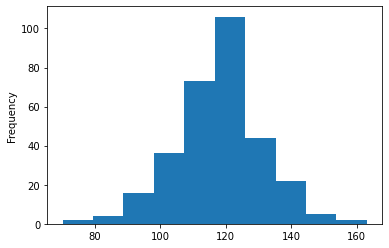

In [13]:
dados['pelvic_radius'].plot(kind='hist')

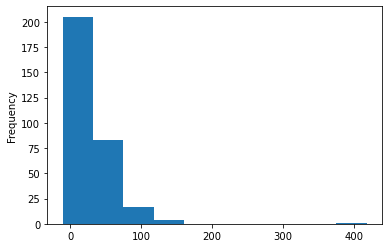

In [14]:
dados['degree_spondylolisthesis'].plot(kind='hist')

Analisamos todos os gráficos, observamos que haverá a necessidade de normalizarmos os dados

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
colunas = dados.columns.drop('class')

In [17]:
colunas

Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis'],
      dtype='object')

In [18]:
sc=StandardScaler()

In [19]:
dados[colunas] = sc.fit_transform(dados[colunas])

In [20]:
dados.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059,Hernia
1,-1.245864,-0.748769,-1.453001,-1.041521,-0.264385,-0.579556,Hernia
2,0.484370,0.467932,-0.099262,0.273083,-0.897686,-0.795421,Hernia
3,0.511390,0.711562,-0.411339,0.126128,-1.207303,-0.402288,Hernia
4,-0.626648,-0.789693,-1.274745,-0.215876,-0.733455,-0.490106,Hernia


Convertendo as classes para valores numéricos

In [21]:
from sklearn.preprocessing import LabelEncoder, label_binarize

Separando nas variáveis X e Y

In [22]:
X = dados.drop('class',axis=1).values

In [23]:
Y = dados['class'].values

In [24]:
Y = label_binarize(Y, classes=classes)

Separando em amostra de treino e teste

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_treino,X_teste,Y_treino,Y_teste=train_test_split(X,Y,test_size=0.25,random_state=0)

Aplicando modelo de Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
modelo = RandomForestClassifier()

In [29]:
modelo.fit(X_treino,Y_treino)

RandomForestClassifier()

Determiando a acurácia na amostra de treino

In [30]:
score_treino = modelo.score(X_treino,Y_treino)

In [31]:
score_treino

1.0

Realizando previsão na amostra de teste

In [32]:
Y_previsto = modelo.predict(X_teste)

In [33]:
score_teste = modelo.score(X_teste,Y_teste)

In [34]:
score_teste

0.7948717948717948

Gerando matriz de confusão

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
cm=confusion_matrix(Y_teste.argmax(axis=1),Y_previsto.argmax(axis=1))

In [37]:
cm

array([[ 8,  0,  7],
       [ 1, 38,  0],
       [ 4,  2, 18]])

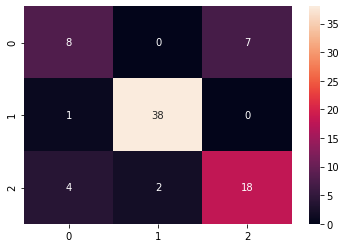

In [38]:
sns.heatmap(cm,annot=True, fmt="d")

Calculando métricas

In [39]:
from sklearn.metrics import classification_report,f1_score,precision_score,average_precision_score,recall_score,accuracy_score

Relatório de classificação

In [40]:
cr = classification_report(Y_teste,Y_previsto,labels=[0,1])
print(cr)

              precision    recall  f1-score   support

           0       0.60      0.40      0.48        15
           1       0.95      0.97      0.96        39

   micro avg       0.88      0.81      0.85        54
   macro avg       0.77      0.69      0.72        54
weighted avg       0.85      0.81      0.83        54
 samples avg       0.56      0.56      0.56        54



/home/usuario/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/usuario/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1-score

In [41]:
f1_macro = f1_score(Y_teste,Y_previsto,average='macro')
print("F1 Macro score = {:0.2f}%".format(f1_macro*100))

f1_wei = f1_score(Y_teste,Y_previsto,average='weighted')
print("F1 Weighted score = {:0.2f}%".format(f1_wei*100))

F1 Macro score = 72.56%
F1 Weighted score = 79.94%


Precision score

In [42]:
precisao_macro = precision_score(Y_teste,Y_previsto,average='macro')
print("Precision score = {:0.2f}%".format(precisao_macro*100))

precisao_wei = precision_score(Y_teste,Y_previsto,average='weighted')
print("Precision score = {:0.2f}%".format(precisao_wei*100))

Precision score = 75.67%
Precision score = 81.19%


Recall score

In [43]:
rec_macro = recall_score(Y_teste,Y_previsto,average='macro')
print("Recall score Macro = {:0.2f}%".format(rec_macro*100))

rec_wei = recall_score(Y_teste,Y_previsto,average='weighted')
print("Recall score Weighted = {:0.2f}%".format(rec_wei*100))

Recall score Macro = 70.81%
Recall score Weighted = 79.49%


Accuracy score

In [44]:
acc = accuracy_score(Y_teste,Y_previsto)
print("Accuracy score = {:0.2f}%".format(acc*100))

Accuracy score = 79.49%


# Curva ROC

In [45]:
from sklearn.metrics import roc_curve, roc_auc_score,auc
from sklearn.multiclass import OneVsRestClassifier

In [46]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_teste[:, i], Y_previsto[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])*100

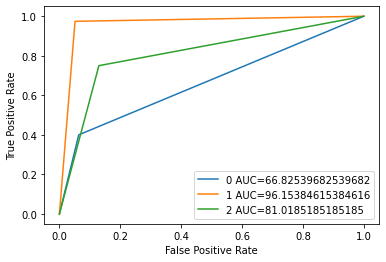

In [47]:
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i],label=str(i)+' AUC='+str(roc_auc[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# Curva Precision-Recall

In [48]:
from sklearn.metrics import precision_recall_curve,auc

In [49]:
lr_precision = dict()
lr_recall = dict()
lr_auc = dict()
for i in range(n_classes):
    lr_precision[i], lr_recall[i], _ = precision_recall_curve(Y_teste[:, i], Y_previsto[:, i])
    lr_auc[i] = auc(lr_recall[i], lr_precision[i])*100

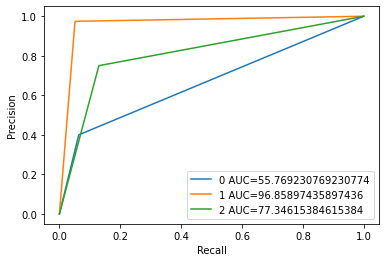

In [50]:
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i],label=str(i)+' AUC='+str(lr_auc[i]))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

# Visualizando a árvore

In [51]:
from sklearn.tree import plot_tree

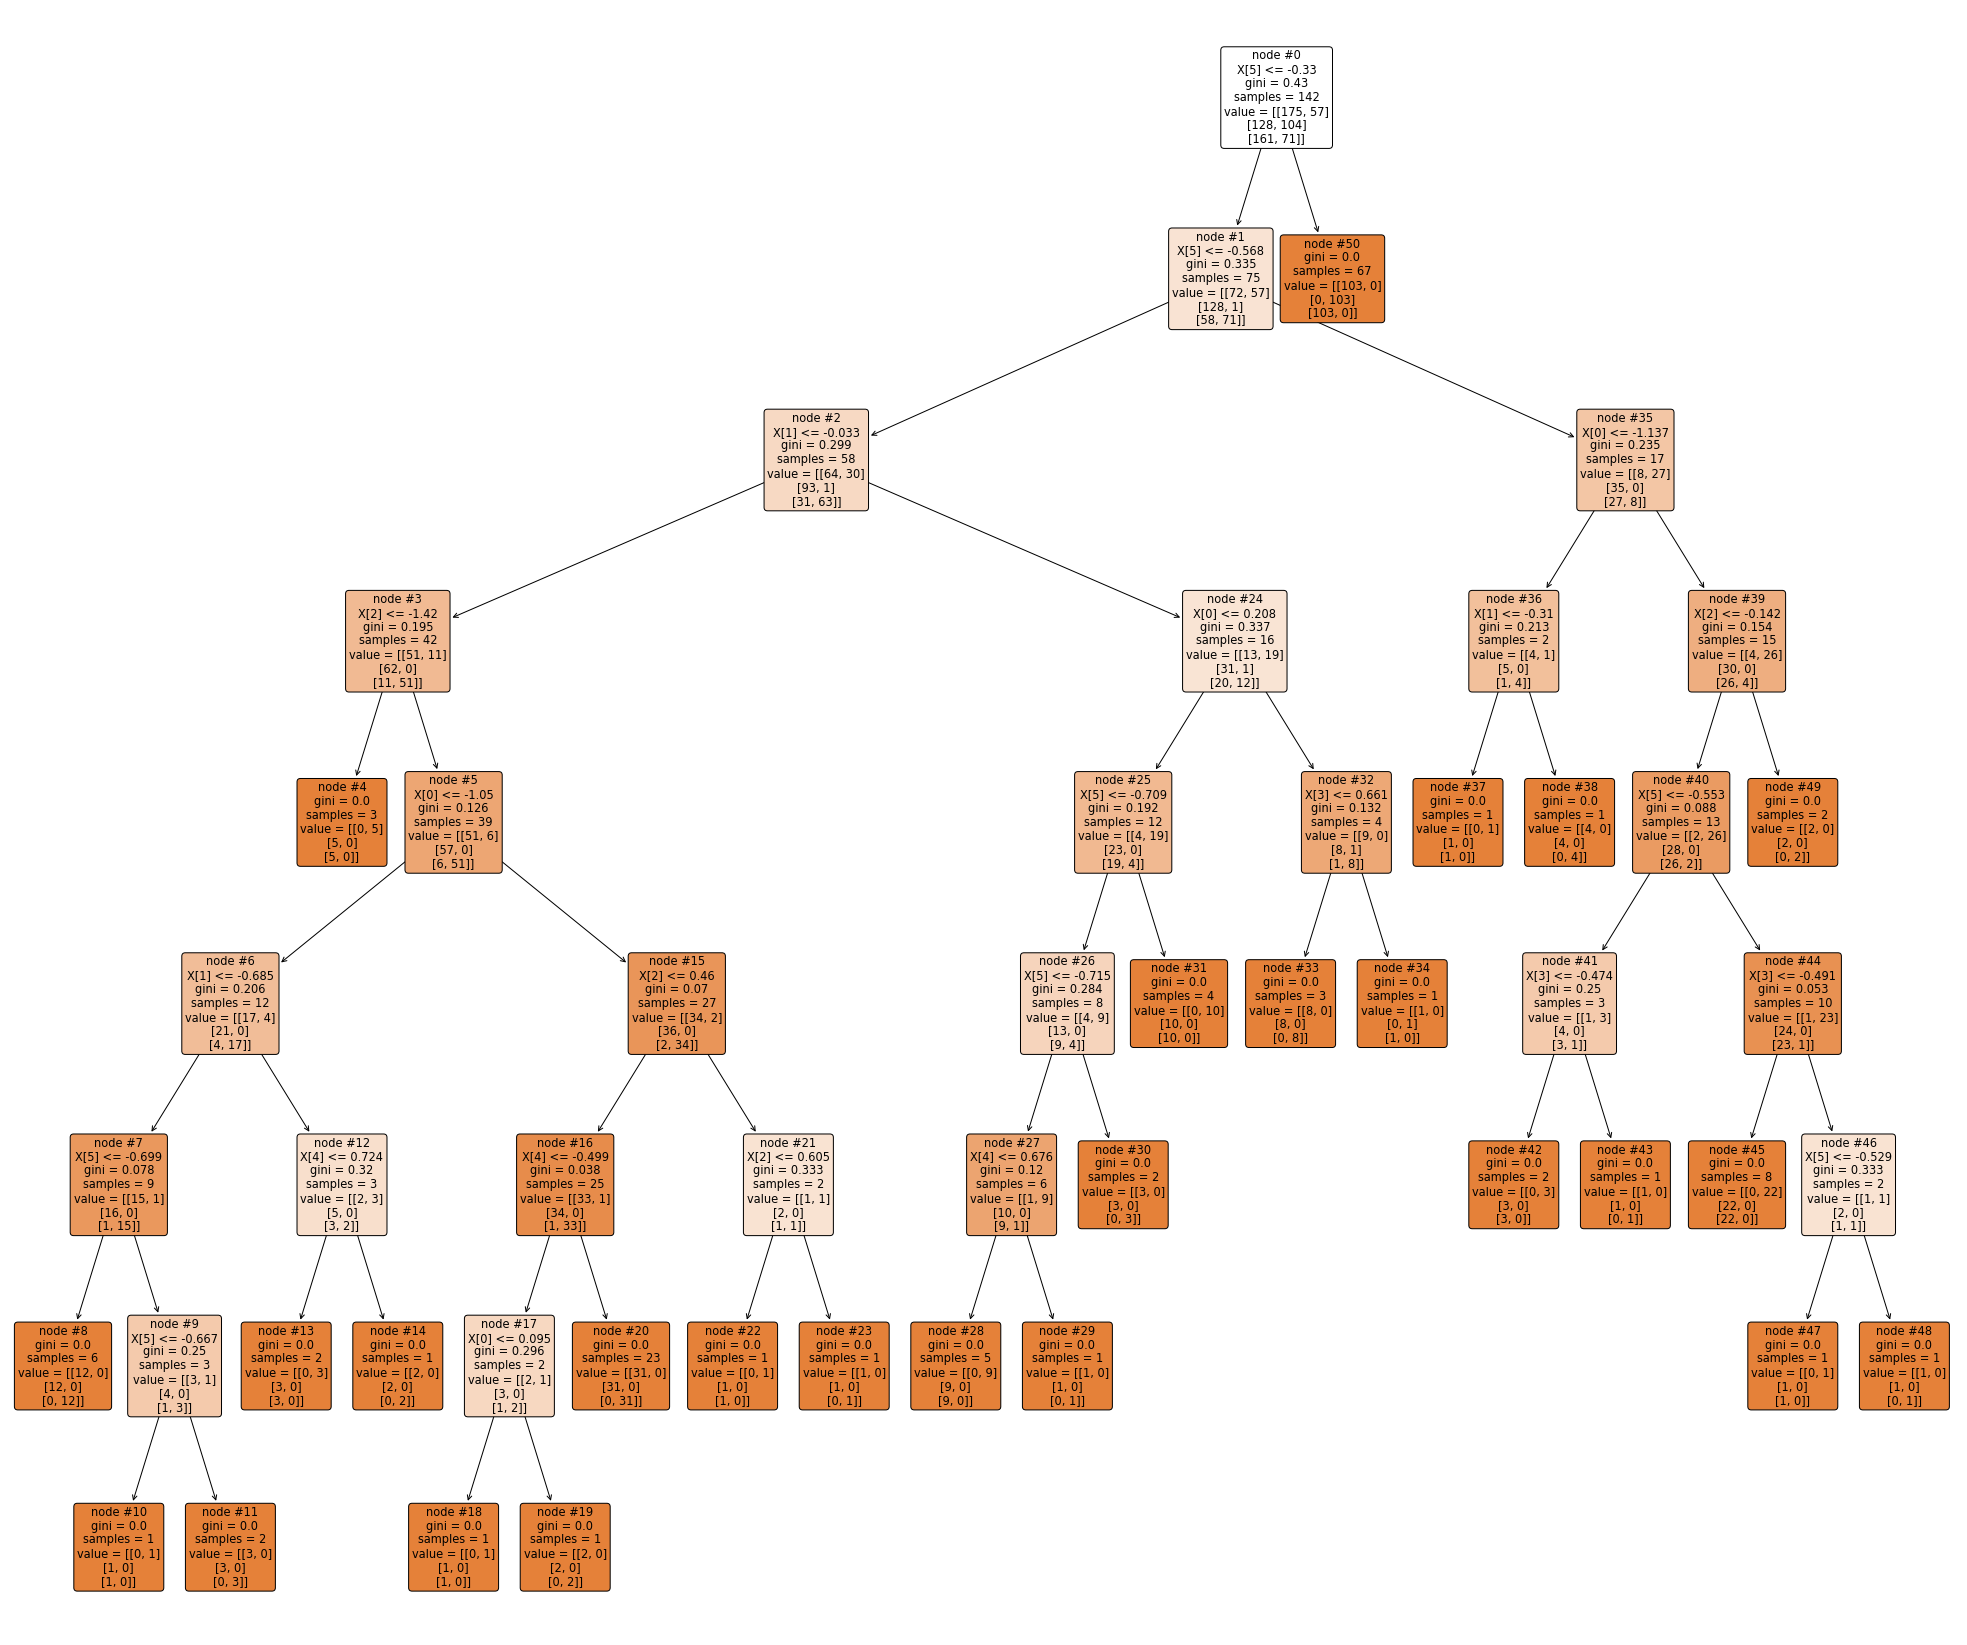

In [52]:
estimator = modelo.estimators_[5]
plt.figure(figsize=(35,30))
plot_tree(estimator,filled=True,node_ids=True,rounded=True);

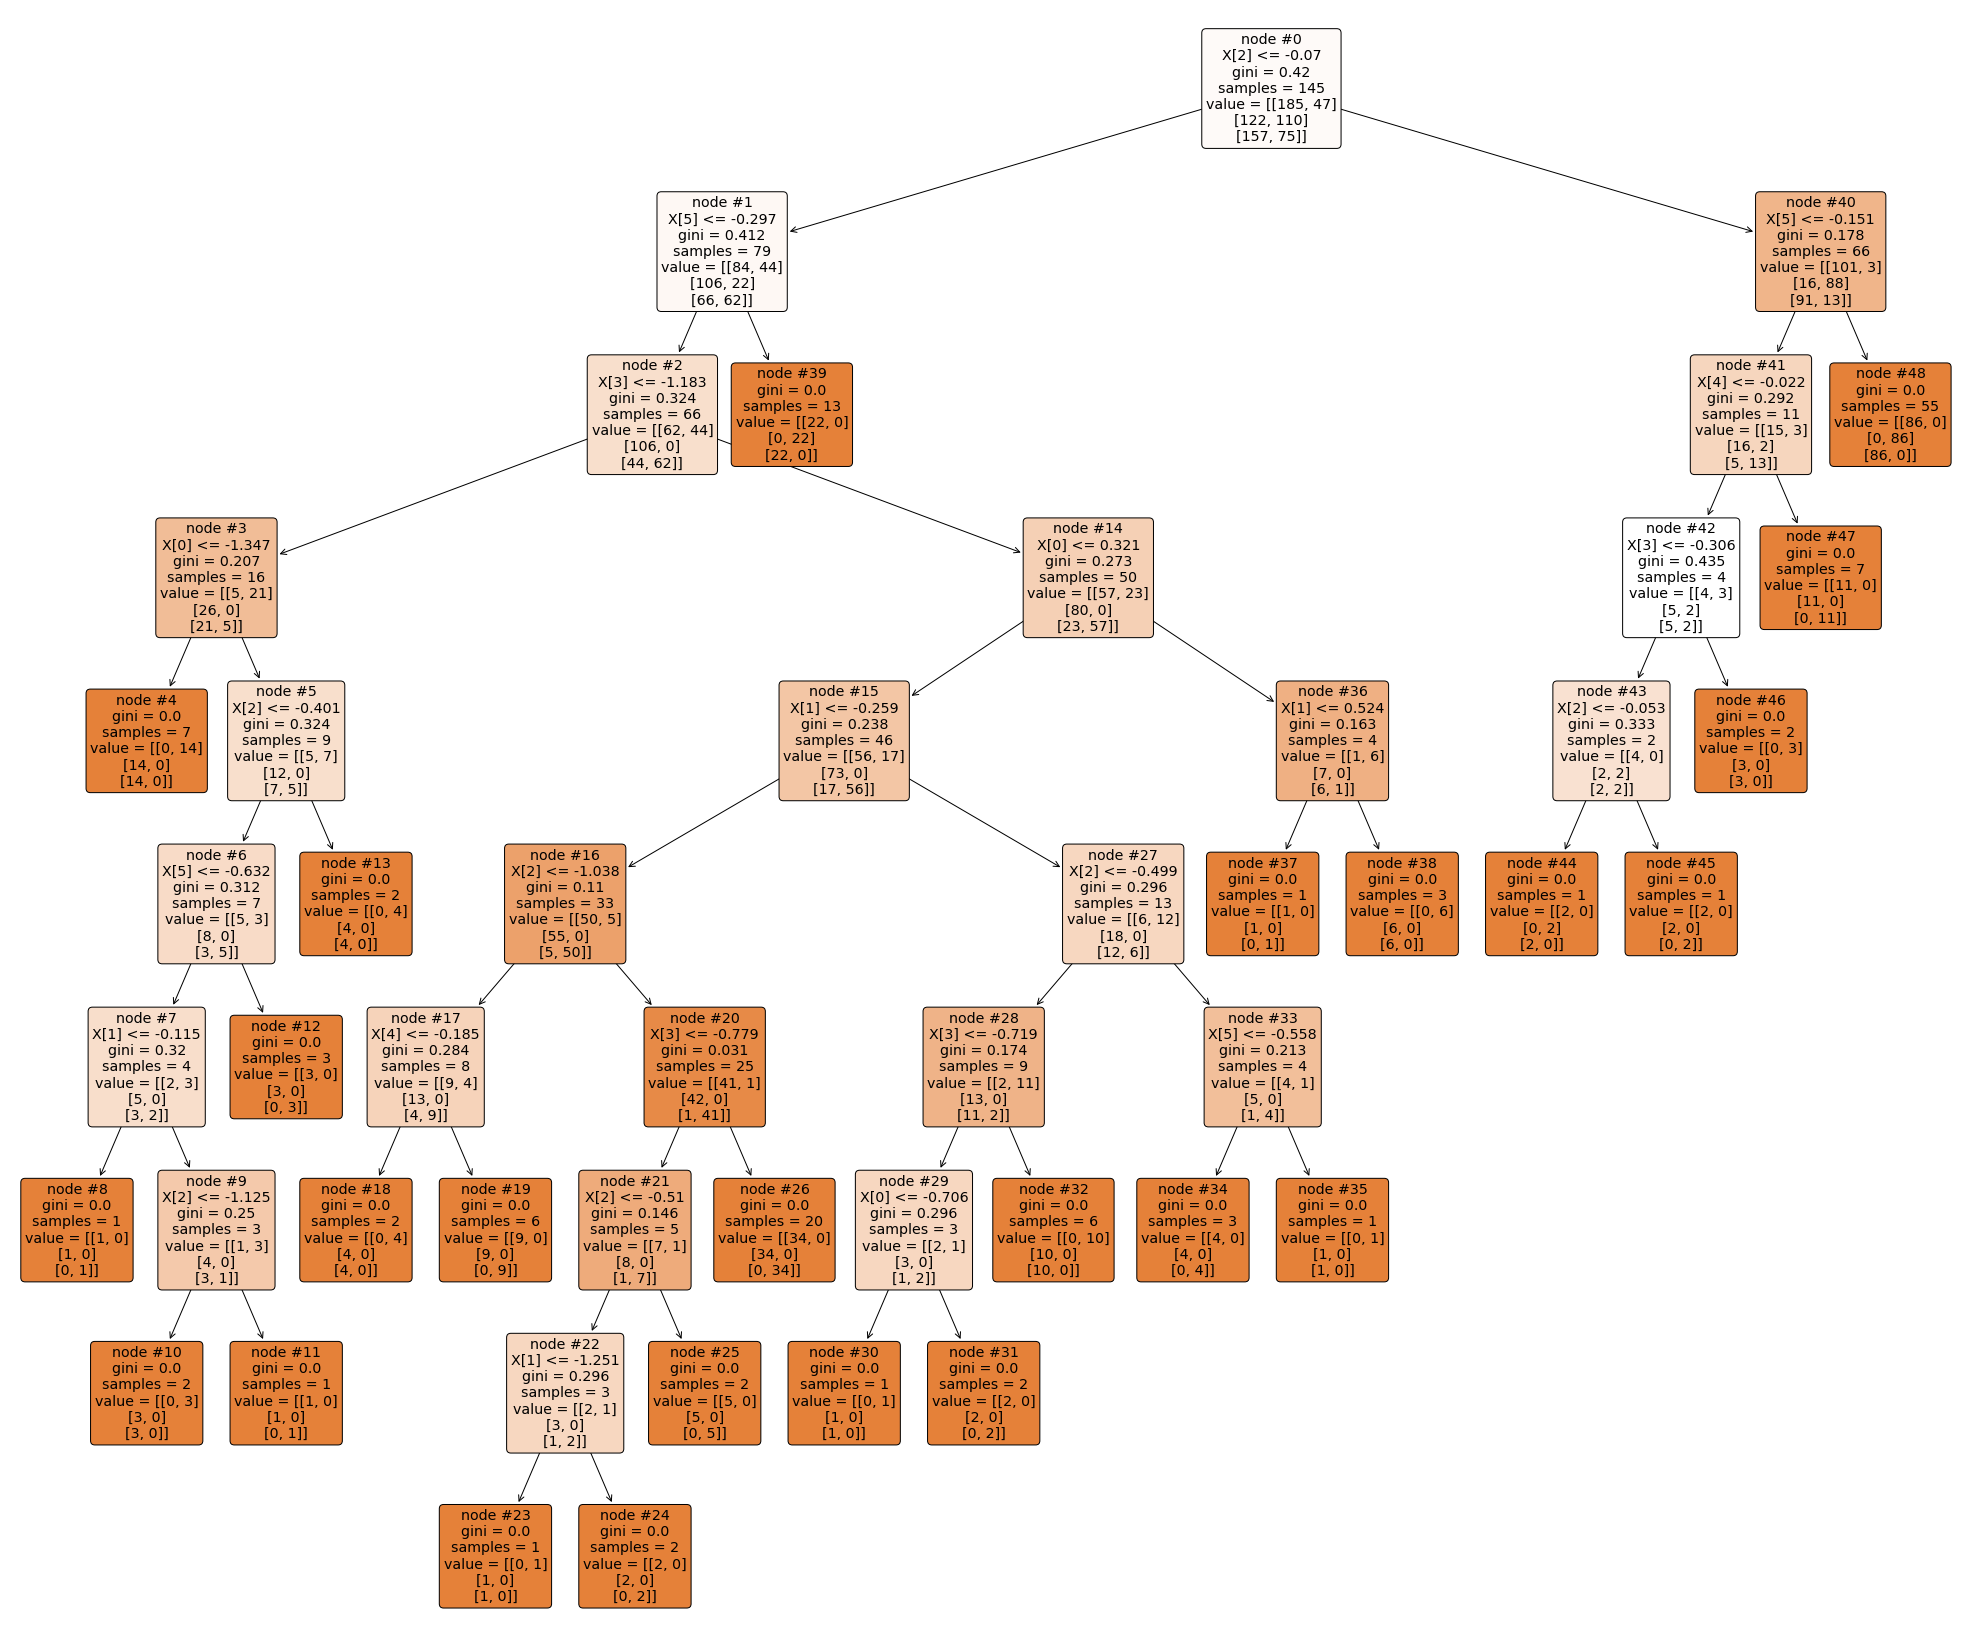

In [53]:
estimator = modelo.estimators_[3]
plt.figure(figsize=(35,30))
plot_tree(estimator,filled=True,node_ids=True,rounded=True);